### Reference

- https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/colorbar_placement.html
- https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html

### 1. Simple Placement

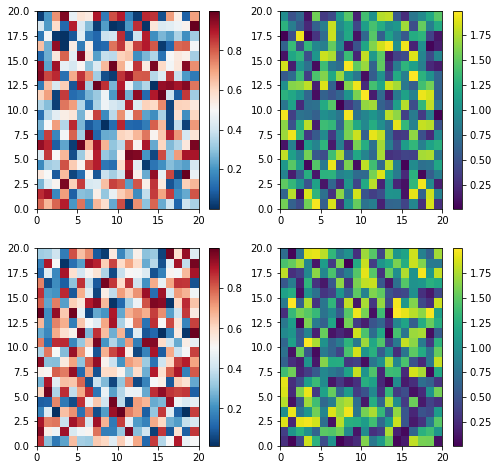

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(8,8))
cm = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cm[col])
        fig.colorbar(pcm, ax=ax)

### 2. Colobar combining with two Axes

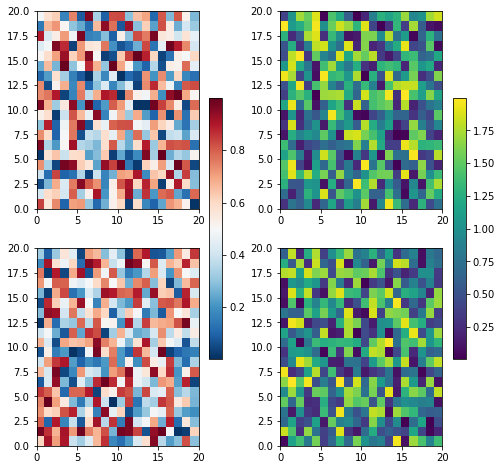

In [2]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
cm = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cm[col])
    fig.colorbar(pcm, ax=axs[:, col], shrink=0.6)

### 3. Constrained Layout
- https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html

- If you create a colorbar with Figure.colorbar, you need to make room for it. constrained_layout does this automatically.

In [5]:
def print_axes_pos(fig):
    axes_all = fig.get_axes()
    for i in range(len(axes_all)):
        bbox = axes_all[i].get_position()
        print('(x0,y0)=({0:0.2f},{1:0.2f}) & (width, height)=({2:0.2f},{3:0.2f})'
              .format(bbox.x0, bbox.y0, bbox.width, bbox.height))

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

arr = np.arange(100).reshape((10, 10))
norm = mcolors.Normalize(vmin=0., vmax=100.)
pc_kwargs = {'rasterized': True, 'cmap': 'viridis', 'norm': norm}

(x0,y0)=(0.12,0.12) & (width, height)=(0.78,0.76)


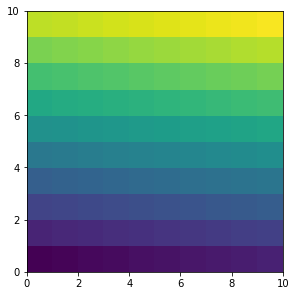

In [7]:
fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=True)
im = ax.pcolormesh(arr, **pc_kwargs)
print_axes_pos(fig)

(x0,y0)=(0.12,0.12) & (width, height)=(0.62,0.76)
(x0,y0)=(0.78,0.13) & (width, height)=(0.04,0.75)


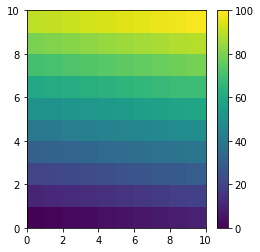

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.pcolormesh(arr, **pc_kwargs)
cb = fig.colorbar(im, ax=ax)
print_axes_pos(fig)

(x0,y0)=(0.12,0.12) & (width, height)=(0.62,0.76)
(x0,y0)=(0.78,0.13) & (width, height)=(0.04,0.75)


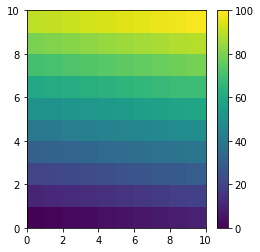

In [9]:
fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=False)
im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=ax)
print_axes_pos(fig)

(x0,y0)=(0.12,0.12) & (width, height)=(0.64,0.76)
(x0,y0)=(0.78,0.12) & (width, height)=(0.12,0.76)


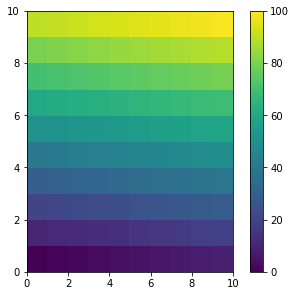

In [10]:
fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=True)
im = ax.pcolormesh(arr, **pc_kwargs)
cb = fig.colorbar(im, ax=ax)
print_axes_pos(fig)

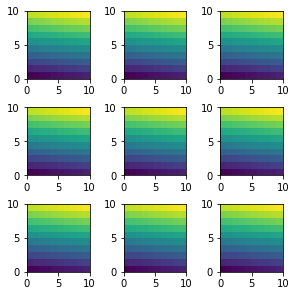

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(4, 4), constrained_layout=True)
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)

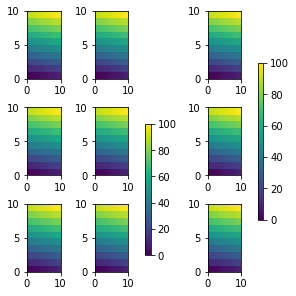

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(4, 4), constrained_layout=True)
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs[1:, ][:, 1], shrink=0.8)
fig.colorbar(im, ax=axs[:, -1], shrink=0.6)

### 4. Complicated

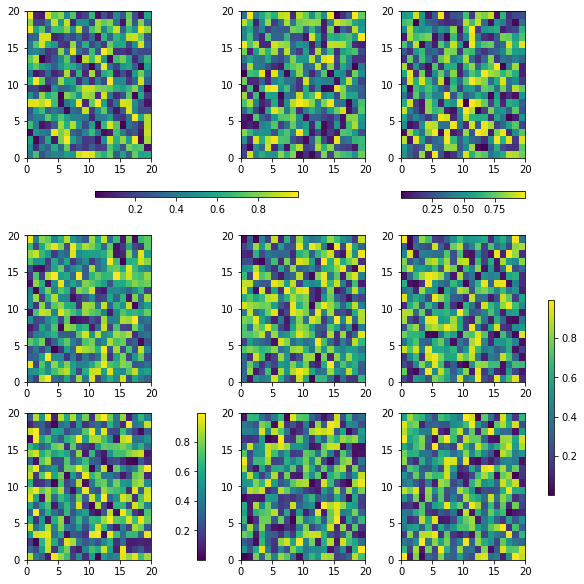

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(8,8),constrained_layout=True)
for ax in axs.flat:
    pcm = ax.pcolormesh(np.random.random((20, 20)))

fig.colorbar(pcm, ax=axs[0, :2], shrink=0.6, location='bottom')
fig.colorbar(pcm, ax=[axs[0, 2]], location='bottom')
fig.colorbar(pcm, ax=axs[1:, :], location='right', shrink=0.6)
fig.colorbar(pcm, ax=[axs[2, 1]], location='left')